## El oscilador de Van der Pol 

<div style="margin: 6 ; text-align: center; overflow: hidden;">
  <div style="float: center;">
    <img src="van_der_pol_circuit.png" width="300px" height="300px">
    Figura 1. Circuito eléctrico de la Ecuación de Van der Pol
  </div>
    
  Balthasar Van der Pol, fue un físico e ingeniero holandés que durante su trabajo en circuitos eléctricos descubrió un sistema dinámico oscilante. Inicialmente se usó como modelo de circuitos eléctricos y se implementó en radios hacia 1920. Sin embargo, al ser un sistema no conservativo con amortiguamiento no lineal típico en la naturaleza, ha sido base para estudios en otras áreas como la matemática, física, biología, ingeniería, medicina, telecomunicaciones, etc. donde aparecen ciclos límites, es decir, estados estables hacia donde convergen las oscilaciones [1]. La ecuación modela un circuito de serie RLC, el cual consta de tres ramas: una resistencia $(R)$, un inductor $(L)$ y un condensador $(C)$; por las cuales circula la corriente de la misma intensidad.


 Este oscilador evoluciona en el tiempo de acuerdo con una ecuación diferencial de
segundo orden, la cual es:
$$  \frac{dx^2}{dt^2}- \mu (1-x^2)\frac{dx}{dt}+x=0$$  

Donde $\mu$ es el coeficiente de amortiguamiento ($\mu$ > 0)  


---

##### Oscilador Amortiguado lineal: 

Cuando lo valores de $|x|$ son pequeños, el término cuadrático en la ecuación de Van der Pol es despreciable, lo cual conduce a un oscilador amortiguado que puede escribirse como un sistema de EDO's de primer orden de dimensión 2D, esto es:

$$ \frac{dx}{dt}= y $$
$$ \frac{dy}{dt}= \mu y -x$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.gridspec as gridspec
from scipy.optimize import fsolve
from scipy.integrate import odeint


%matplotlib inline 

In [3]:
#------------------ runge-kutta 4 method ---------------------------
# resolve a system with several ordinary differential eq. (ode)
def rk4(f,y,t,b,n,a, mu):
    d  = len(y)   # get system size: 2 ecuaciones. condiciones iniciales en y. (f,y0,a,b,n) 
    k1 = np.zeros(d)
    k2 = np.zeros(d)
    k3 = np.zeros(d)
    k4 = np.zeros(d)
    
    tt = np.zeros(n)
    Y  = np.zeros((d,n))      
    h = (b - a)/n
    ti = 0
    while ti<n:

        for i in range(d):  Y[i, ti] = y[i] # store coord
        tt[ti] = t                          # store time

        # *** runge kutta 4 method ***   
        k1 = h*f(t, y, mu)
        k2 = h*f(t + h/2., y + k1/2., mu)
        k3 = h*f(t + h/2., y + k2/2., mu)
        k4 = h*f(t + h, y + k3, mu)
        
        y = y + (k1 + 2.*(k2 + k3) + k4)/6.  #guardo nuevo y
    
        t = t + h  
        ti = ti + 1
        
    return Y,tt # output: arrays with coords to plot. valores respecto al teimpo 

#------------------------------

In [6]:
def f_lineal(t, y, mu):  
    #f1 = y[1]                  
    #f2 = mu*y[0]-y[0]
    f1 = y[1]                  
    f2 = mu*y[1]-y[0]
    return np.array([f1,f2])

In [7]:
def phase(n, mu, f,title):  
    y = np.zeros(n)
    time = np.zeros(n)
    y[0] = 0             
    time[0] = 1 #Tiempo incicial 1 segundo
    a = 0.0   # intervalo en tiempo   
    b = 50.0 
    y0 = np.array([0, 5]) # Condiciones iniciales
    
    Y, time2 = rk4(f,y0,a,b,n,a,mu)    
    
    plt.plot(time2, Y[0], color='blue',label="u="+str(mu)) # En Y[0] o primea fila, se encuentran los valores del x
    plt.legend()
    plt.xlabel('$Tiempo$')
    plt.ylabel('$X(t)$')
    plt.title(title)
    plt.show()   

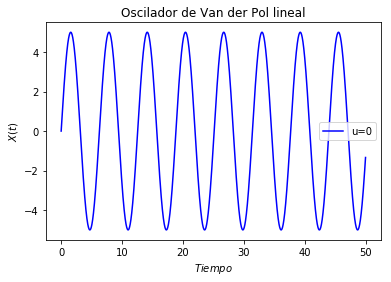

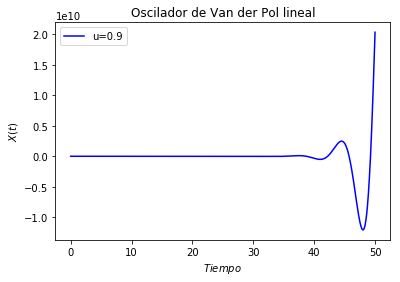

In [8]:
phase(10000, 0, f_lineal, "Oscilador de Van der Pol lineal")
phase(10000, 0.9, f_lineal, "Oscilador de Van der Pol lineal")

In [14]:
def diagram_flujo_lineal(mu, title):
    w = 3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    U = Y
    V = mu*Y - X

    fig = plt.figure(figsize=(20, 30))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

   
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X, Y, U, V, density=[1.2, 1])
    ax0.set_title(title+' u='+str(mu))
    plt.xlabel("x")
    plt.ylabel("y")

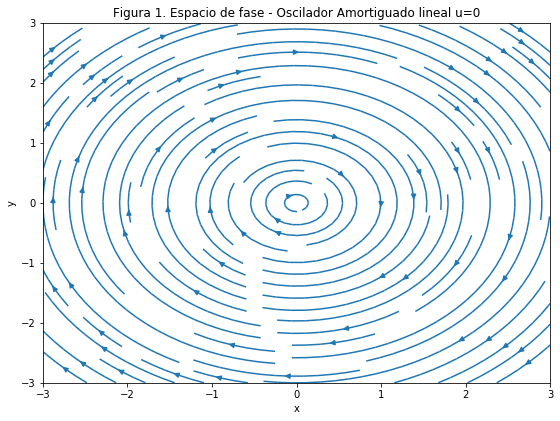

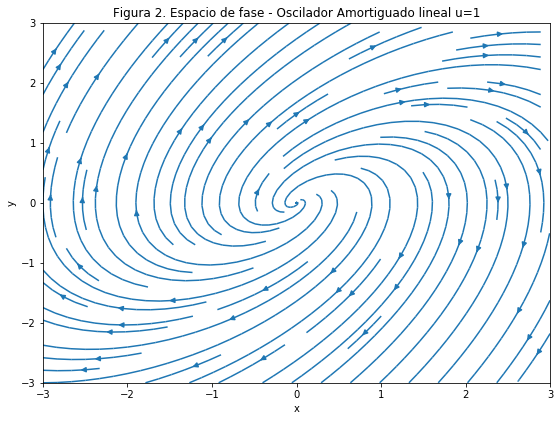

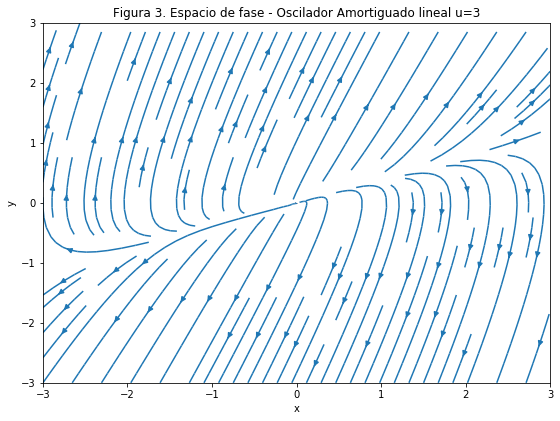

In [15]:
diagram_flujo_lineal(0, 'Figura 1. Espacio de fase - Oscilador Amortiguado lineal')
diagram_flujo_lineal(1, 'Figura 2. Espacio de fase - Oscilador Amortiguado lineal')
diagram_flujo_lineal(3, 'Figura 3. Espacio de fase - Oscilador Amortiguado lineal')

Se encuentra que el único punto fijo que satisface el sistema es $P =(0, 0)$. Para hallar su estabilidad, se procedió a hallar la matriz asociada al sistema de ecuaciones y se encontró la traza y determinante de este, tal que para el intervalo $(0 < \mu < 2)$,el discriminante es negativo, lo cual implica que el punto fijo sea una espiral (figura 2). En el intervalo $(\mu ≥ 2)$ satisface para nodos degenerados (figura 2). Como la traza siempre es negativa, entonces ambos casos son consistentes con puntos inestables. Por otro lado, cuando $(\mu = 0)$, el punto de equilibrio es un centro (figura 1) y el sistema se convierte en un oscilador armónico simple.

----

### Oscilador Amortiguado con $\mu << 1$: 

Para valores de $|x|$ no despreciables y utilizando la Transformación de Liénard, se puede formar un sistema autónomo no lineal de EDOs, de forma que:

$$ \frac{dy}{dt}=  x$$
$$ \frac{dx}{dt}= \mu (x-\frac{x^3}{3})- y$$

In [91]:
def f_mu_bajo(t, y, mu):  
    #f1 = y[1]                  
    #f2 = mu*(1-y[0]**2)*y[1]-y[0]
    f1 = y[1]                  
    f2 = mu*(y[1]-((y[1]**3)/3))-y[0]
    return np.array([f1,f2])

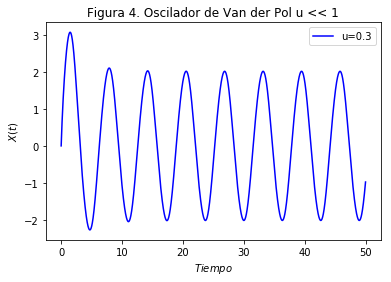

In [92]:
phase(10000, 0.3, f_mu_bajo, "Figura 4. Oscilador de Van der Pol u << 1")  

El punto fijo asociado al sistema es el mismo punto del caso lineal $P = (0,0)$. Para hallar su estabilidad y evolución se encontró la matriz Jacobiana asociada al sistema de ecuaciones evaluada en P y se obtuvo que punto de
equilibrio es una espiral asintóticamente inestable en sentido horario (figuras 5 y 6). 


In [57]:
def diagram_flujo_amortiguado_bajo(mu, title):
    w=3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    U = mu*(X-((X**3)/3))-Y
    V = X

    fig = plt.figure(figsize=(20, 30))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
    
    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X, Y, U, V, density=[1.2, 1])
    ax0.set_title(title+str(mu))
    #ax0.plot(Xo,Yo(Xo), linewidth=4)
    
    circ = plt.Circle((0, 0), radius=2, edgecolor='b', facecolor='None', linewidth=4)
    ax0.add_patch(circ)

Se encuentra un ciclo limite tal que:

$$\frac{dr}{dt} = \frac{\mu r}{8}(4-r^2)$$

$\frac{dr}{dt}> 0$ si $r>2$

$\frac{dr}{dt}< 0$ si $r<2$


El ciclo límite estable representa la región donde la generación y disipación de energía se equilibran y se producen oscilaciones estacionarias gracias al equilibrio dinámico, y por el cual el sistema adquiere un nivel más alto de energía que su entorno.

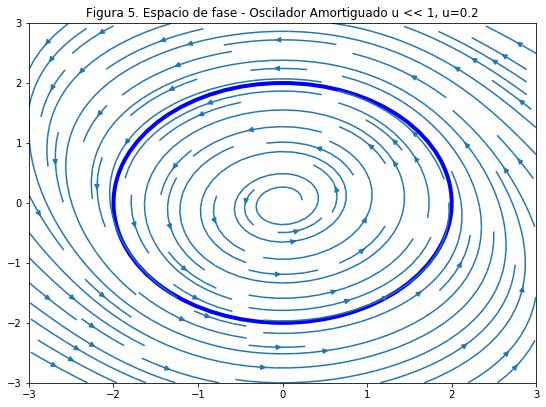

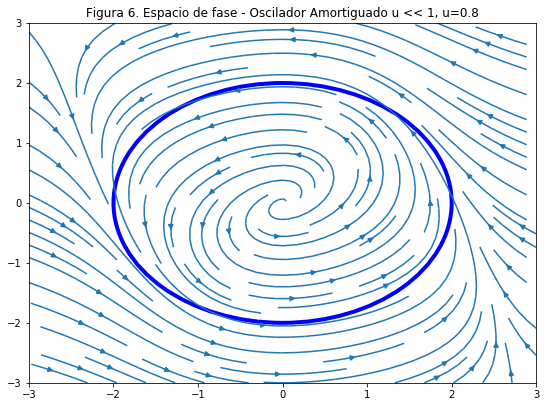

In [58]:
diagram_flujo_amortiguado_bajo(0.2, 'Figura 5. Espacio de fase - Oscilador Amortiguado u << 1, u=')
diagram_flujo_amortiguado_bajo(0.8,'Figura 6. Espacio de fase - Oscilador Amortiguado u << 1, u=' )

---

### Oscilador de Van der Pol con ($\mu >> 1$):

Dada la nueva condición, se realizó la sustitución y → μy. Este nuevo sistema cuenta de igual forma con el punto fijo
en P. Al evaluar en la matriz Jacobiana asociada al sistema, se cumplen las condiciones de la traza y el determinante. Además, por la condición:
$tra(A)^2-4det(A)$, el punto fijo es un nodo inestable.

$$ \frac{dy}{dt}=  \frac{x}{\mu}$$
$$ \frac{dx}{dt}= \mu (x-\frac{x^3}{3}-y)$$

In [93]:
def f_mu_alto(t, y, mu):  
    #f1 = y[1]/mu                  
    #f2 = mu*(1-y[0]**2)*y[1]-y[0]
    f1 = y[1]/mu                  
    f2 = mu*(y[1]-((y[1]**3)/3)-y[0])
    return np.array([f1,f2])

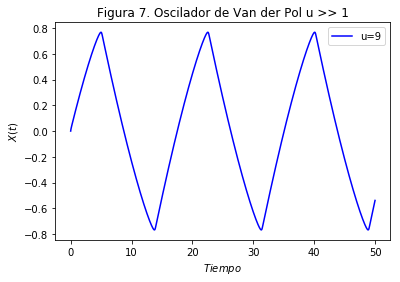

In [94]:
phase(10000, 9, f_mu_alto, "Figura 7. Oscilador de Van der Pol u >> 1")  

Cuando B.Van der Pol desarrolló su ecuación en un circuito electrónico, halló que el periodo de oscilación estaba determinado por μ = RC, el cual llamó Oscilación de relajación [2], cuya característica, como se puede ver en la figura 7, son el comportamiento asintótico lento y un salto discontinuo repentino.

In [64]:
def diagram_flujo_amortiguado_alto(mu, title):
    w = 3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    U = mu*(X-((X**3)/3)-Y)
    V = X/mu

    fig = plt.figure(figsize=(20, 30))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    Yo = lambda X: X-(X**3)/3
    Xo = np.linspace(-2,2,100)
    
    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X, Y, U, V, density=[1.2, 1])
    ax0.set_title(title+str(mu))
    ax0.plot(Xo,Yo(Xo), linewidth=4, color="blue")
    ax0.plot(1,2/3,"o", label="P2", color="red")
    ax0.plot(0,0,"o", label="P", color="yellow")
    ax0.plot(-1,-2/3,"o", label="P1", color="violet")
    ax0.legend()
    
    plt.xlabel("x")
    plt.ylabel("y")
    

En el punto fijo  $P(0,0)$ se encuentra la curva $$y = x- \frac{x^3}{3}$$


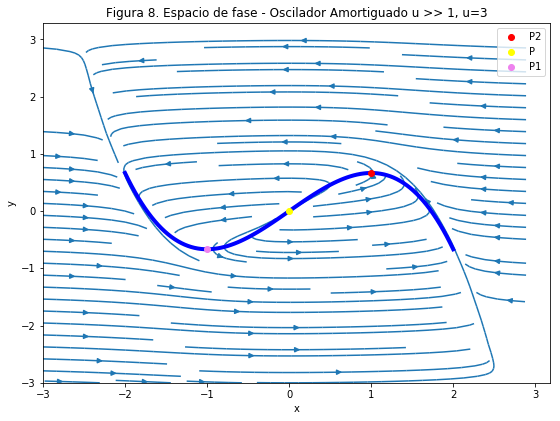

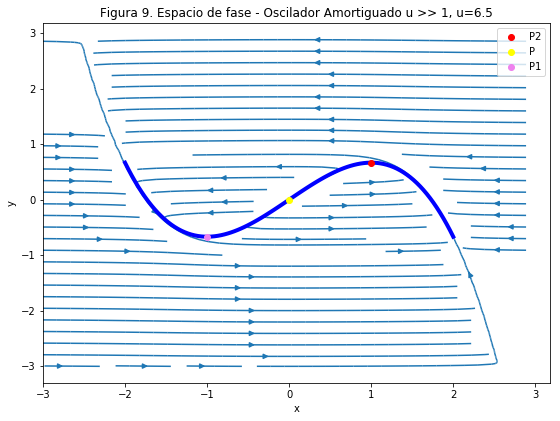

In [65]:
diagram_flujo_amortiguado_alto(3, 'Figura 8. Espacio de fase - Oscilador Amortiguado u >> 1, u=')
diagram_flujo_amortiguado_alto(6.5,'Figura 9. Espacio de fase - Oscilador Amortiguado u >> 1, u=' )

Cuando el sistema se encuentra fuera de la curva se satisface la relación $|x'|>>|y'|$ lo que significa que el sistema se mueve rápidamente en dirección horizontal. Cuando el sistema se encuentra en la región de la curva se satisface $|x'| = |y'|$ y después de ingresar a este límite, las trayectorias giran bruscamente y siguen la curva hasta que alcanza su punto máximo $P_2(1, 2/3)$ o su punto mínimo $P_1(-1, -2/3)$ por lo que el sistema fluye despacio a lo largo de la curva y eventualmente sale de la región. Se observa en las figuras 8 y 9 un ciclo límite estable. 

En un sistema en estado estacionario las variables de estado son invariantes en el tiempo. Sin embargo, la existencia de un equilibrio dinámico, donde el estado permanece constante mientras exista trabajo continuo, conduce a un sistema con un nivel más alto de energía que su entorno. Su estabilidad dinámica significa que las perturbaciones serán amortiguadas gradualmente hasta conducirlo hasta su estado original de equilibrio.


----

### Modelo de Bonhoeffer-van der Pol (BVP):

Ahora a partir del modelo de Van der Pol para gran amortiguaminto, el modelo de Bonhoeffer-van der Pol agrega términos al sistema de EDOs en el cual las variables de estado representan excitabilidad (x) y refractariedad (y), estados fisiológicos de una fibra nerviosa [3].

$$ \frac{dx}{dt}=  \mu (x-\frac{x^3}{3}+y)$$
$$ \frac{dy}{dt}= -\frac{x-a+by}{\mu}$$

Una neurona en reposo tiene un voltaje a través de su membrana lipídica que se llama el 'potencial de membrana' o 'potencial en reposo' de unos -70mV. La célula está polarizada y se debe a gradientes de concentración de iones y la permeabilidad de la membrana hacia estos iones. La concentración de estos no es igual para el medio intracelular y extracelular, pues normalmente están determinados por los iones más abundantes en este medio como lo son los cationes de sodio $(N_a^+)$ y potasio $(K^+)$ y los aniones de cloro $(Cl^-)$. 

El interior de la célula es más negativo debido a los aniones presentes en los aminoácidos, al contrario del medio extracelular, que tiene una mayor concentración de sodio. Este gradiente de concentración se disminuye a través de canales proteicos en la membrana de la célula que se llaman 'canales de sodio-potasio'. Estos canales solo se activan frente a determinados estímulos que pueden ser moléculas de ATP (Trifosfato de Adenosina) y mantener este estado polarizado requiere energia por parte de la célula, así que cuando el interior de la célula está más positivo que el potencial de reposo, la membrana se despolariza y por el contrario, si el interior está más negativo, la membrana se  hiperpolarizada. 


In [95]:
def f_Bonhoeffer(t, y, mu):  
    #f1 = mu*(y[0]+y[1]-((y[0]**3)/3))                 
    #f2 = -(y[0]-0.7+0.8*y[0])/mu
    f1 = mu*(y[0]+y[1]-((y[0]**3)/3))                 
    f2 = -(y[0]-0.7+0.8*y[1])/mu
    return np.array([f1,f2])

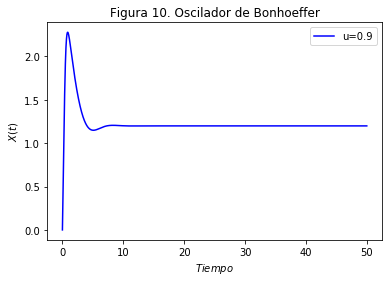

In [101]:
phase(10000, 0.9, f_Bonhoeffer, "Figura 10. Oscilador de Bonhoeffer")  

In [65]:
def f_inte(x):
    return -x+((x**3)/3)-((0.7-x)/0.8)

print("punto fijo, x=",fsolve(f_inte, 2))

punto fijo, x= [1.19940804]


Con $ \frac{dx}{dt}= 0$ y $ \frac{dy}{dt}= 0 $: entonces 
$$y = \mu (-x+\frac{x^3}{3})$$
$$y=\frac{a-x}{b}$$ 


El sistema se puede analizar en principio como una sistema reducido con solo variable $x$ y $y$, y se encontro el estado de potencial de reposo, con el punto $P3 (x = 1.199, y = −0.625)$ que es estable.

El máximo de la curva es el punto $P_1 (1, -2/3)$ que es estable y representa un punto de exitacion y el mínimo de la curva es el punto inestable $P_2 (-1, 2/3)$ que es un fenomeno de umbral. El potencial de umbral es el nivel crítico al que se debe despolarizar un potencial de membrana para iniciar un potencial de acción que es de alrededor de –50 y –55 mV.

Un desplazamiento desde el punto de reposo estable $P_3$ a la izquierda de $P_2$, causa exitación (propiedad del potencial de membrana) y se aproxima al punto estable $P_1$, pero considerando el sistema $(x,y)$ completo, la variable $y$ incrementa lentamente hasta que estos dos se encuentran y desvanecen. De allí el sistema se aproximará de nuevo al punto estable $P_3$ estable (Figura 11).

Lo cual significa que una vez que un estímulo activa los canales de sodio regulados por voltaje para que se abran, los iones de sodio positivos fluyen hacia la célula y el voltaje aumenta. Este proceso también puede iniciarse mediante la unión de un ligando o neurotransmisor a un canal. La despolarización por encima del umbral $P_2$ da como resultado un aumento en la conductancia de $N_a^+$ suficiente para que el movimiento de sodio hacia el interior lleve inmediatamente el movimiento de potasio hacia el exterior. El influjo de sodio despolariza la célula en un intento de establecer su propio potencial de equilibrio. La hiperpolarización por los canales de potasio causa un período refractario que hace que sea mucho más difícil alcanzar el umbral.


In [98]:
def diagram_Bonhoeffer(mu,a,b, title):
    w = 3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    U = mu*(X-((X**3)/3)+Y)
    V = -(X-a+b*Y)/mu

    fig = plt.figure(figsize=(30, 40))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    Xo = np.linspace(-2,2,100)
    X1 = np.ones(100)
    Yo = lambda X: -X+(X**3)/3
    Y1 = lambda X: (a-X)/b
    
    
    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X, Y, U, V, density=[1.2, 1])
    ax0.set_title(title+str(mu))
    ax0.plot(Xo,Yo(Xo), linewidth=5, label = "dx/dt = 0", color="blue")
    ax0.plot(Xo,Y1(Xo), linewidth=5, label = "dy/dt = 0", color="green")
    ax0.plot(1.199,-0.625, "o", label="P3",color="yellow")
    ax0.plot(1,-2/3,"o", label="P2", color="red")
    ax0.plot(-1,2/3,"o", label="P1", color="violet")
    ax0.legend()
    
    plt.xlabel("x")
    plt.ylabel("y")
    

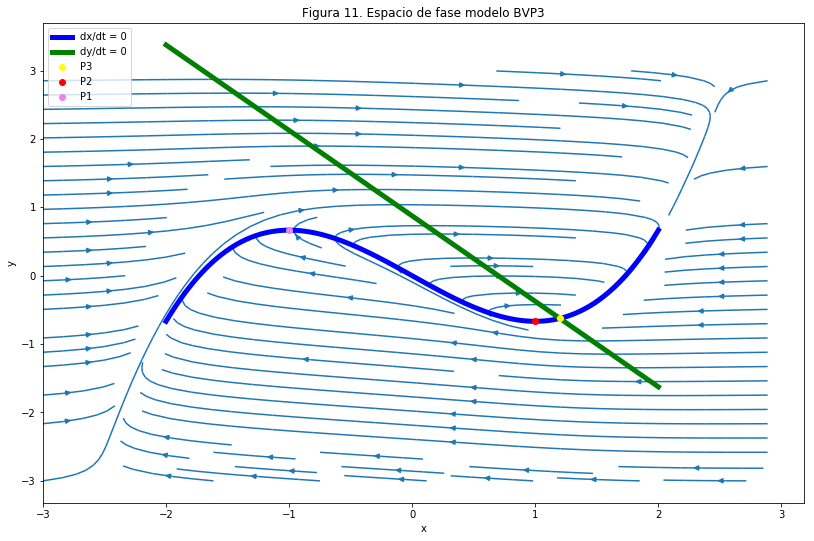

In [101]:
diagram_Bonhoeffer(3,0.7,0.8,"Figura 11. Espacio de fase modelo BVP")

### Referencias:

- [1] J. Sánchez, (2010) “Van der Pol a través de sistemas dinámicos.” Universidad central de Venezuela, pp. 7 - 8
- [2] A. Abidi, R. Meyer, (1983) “Noise in relaxation oscillators” IEEE JOURNAL OF SOLID-STATECIRCUITS,VOL. SC-18,NO. 6, https://bit.ly/2FLwnAu
- [3] R. Fitzhugh, (1961) “Impulses and physiological states in theoretical models of nerve membrane” Biophysical Journal, Vol 1, No.6, pp. 445-466

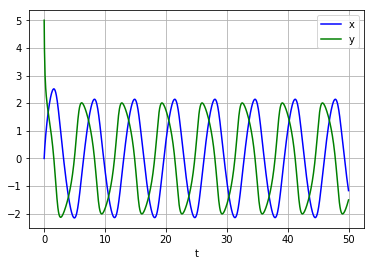

In [6]:
def pend(y, t, mu, a):
    X, Y = y
    #dydt = [Y, mu*Y-a*X]
    dydt = [Y, mu*(Y-((Y**3)/3))-X]
    return dydt

def condi(n, f, mu, a):
    y0 = [0.0,5]
    t = np.linspace(0, 50, 1000)
    sol = odeint(f, y0, t, args=(mu,a))
    
    plt.plot(t, sol[:, 0], 'b', label='x')
    plt.plot(t, sol[:, 1], 'g', label='y')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

condi(1000, pend, 0.9, 1)